<a href="https://colab.research.google.com/github/Lucho-Pizarro/Portafolio/blob/main/pib_wb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uso de la api del Banco Mundial

In [3]:
# Instalar Biblioeteca

%pip install wbgapi

In [4]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

In [5]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Ciencia de datos economia/Datos/')

import my_func as fn

Mounted at /content/drive


In [6]:
# Importar

import wbgapi as wb
help(wb)

Help on package wbgapi:

NAME
    wbgapi

DESCRIPTION
    wbgapi provides a comprehensive interface to the World Bank's data and
    metadata API with built-in pandas integration

PACKAGE CONTENTS
    __version__
    data
    economy
    economy_coder
    economy_metadata
    income
    lending
    region
    series
    series_metadata
    source
    time
    topic
    utils

CLASSES
    builtins.Exception(builtins.BaseException)
        APIError
            APIResponseError
        URLError
    builtins.dict(builtins.object)
        Coder
    builtins.object
        Featureset
        Metadata
        MetadataCollection

    class APIError(builtins.Exception)
     |  APIError(url, msg, code=None)
     |
     |  Method resolution order:
     |      APIError
     |      builtins.Exception
     |      builtins.BaseException
     |      builtins.object
     |
     |  Methods defined here:
     |
     |  __init__(self, url, msg, code=None)
     |      Initialize self.  See help(type(self))

<unknown>:639: SyntaxWarning: invalid escape sequence '\w'
<unknown>:639: SyntaxWarning: invalid escape sequence '\w'
<unknown>:639: SyntaxWarning: invalid escape sequence '\w'
<unknown>:639: SyntaxWarning: invalid escape sequence '\w'
<unknown>:639: SyntaxWarning: invalid escape sequence '\w'


Usando la api del Banco Mundial es posible acceder a estadisticas diversas sobre el desarollo Economico. A continuacion extraeremos informacion de 65 indicadores economcios

In [7]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [8]:
paises_web_raw = fn.descargar_en_chunks(indicadores_wb , años = 2023 , chunk_size = 15)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS']
Descargando bloque 2: ['SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS', 'SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 3: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS']
Descargando bloque 4: ['EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE.AR5', 'SE.PRM.NENR', '

Analisis exploratorio de Datos

In [9]:
paises_web_raw.head(20)

,country,Country,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,8.526678e+10,49.843240,6232464.0,1.677096,16340822.0,8559888.0,52.383460,7780934.0,...,NaN,NaN,65.013,62.775000,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,7.612916e+10,46.170619,7147630.0,2.794068,20723965.0,10467717.0,50.510204,10256248.0,...,NaN,NaN,68.673,66.349000,63.936,2.3,16.8,NaN,NaN,33.0000
3,PSE,West Bank and Gaza,2.769440e+10,NaN,NaN,2.393265,5165775.0,2598445.0,50.301172,2567330.0,...,54.781748,33.968858,71.502,65.170000,59.691,NaN,NaN,86.2802,86.9849,86.6377
5,VNM,Viet Nam,1.359364e+12,48.623244,56799003.0,0.671429,100352192.0,51201223.0,51.021529,49150969.0,...,36.077468,29.637136,79.264,74.588000,69.877,98.7,99.4,75.8894,80.3200,78.0800
7,VUT,Vanuatu,1.030020e+09,46.126995,115453.0,2.324816,320409.0,158611.0,49.502667,161798.0,...,NaN,NaN,73.927,71.477000,69.445,9.0,52.3,NaN,NaN,45.7313
8,UZB,Uzbekistan,3.567971e+11,35.481852,13809189.0,2.021146,35652307.0,17670093.0,49.562271,17982214.0,...,46.465933,45.087905,75.401,72.388000,69.450,70.9,96.8,87.1292,90.9056,89.0136
9,URY,Uruguay,1.052313e+11,46.719084,1761109.0,-0.083552,3388081.0,1745071.0,51.506177,1643010.0,...,101.562689,59.210384,81.920,78.138000,74.192,100.0,100.0,NaN,NaN,89.8960
10,USA,United States,2.497712e+13,45.567571,172300802.0,0.831493,336806231.0,167569583.0,49.752519,169236648.0,...,NaN,NaN,81.100,78.385366,75.800,100.0,100.0,NaN,NaN,93.1444
11,GBR,United Kingdom,3.602178e+12,47.539585,34950053.0,1.304980,68492000.0,34773417.0,50.770041,33718583.0,...,93.725319,67.925537,83.208,81.238098,79.362,100.0,100.0,NaN,NaN,96.2988
12,ARE,United Arab Emirates,7.363772e+11,23.050942,6793436.0,3.977171,10483751.0,3772859.0,35.987679,6710892.0,...,70.177767,54.315438,84.204,82.909000,81.978,100.0,100.0,100.0000,100.0000,100.0000


Al revisar los primeros y ultimos registros se observa que la extraccion de datos contiene datos de paises y areas geograficas. Por lo tanto, se procede a la limpieza de datos

Una vez seleccionado solamente los paises procederemos el analisis exploratorio de los datos

In [10]:
paises_web_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 265
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  246 non-null    object 
 1   Country                  246 non-null    object 
 2   NY.GDP.MKTP.PP.KD        246 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        221 non-null    float64
 4   SL.TLF.TOTL.IN           221 non-null    float64
 5   SP.POP.GROW              246 non-null    float64
 6   SP.POP.TOTL              246 non-null    float64
 7   SP.POP.TOTL.FE.IN        246 non-null    float64
 8   SP.POP.TOTL.FE.ZS        246 non-null    float64
 9   SP.POP.TOTL.MA.IN        246 non-null    float64
 10  SP.POP.TOTL.MA.ZS        246 non-null    float64
 11  SP.RUR.TOTL              246 non-null    float64
 12  SP.RUR.TOTL.ZG           237 non-null    float64
 13  SP.RUR.TOTL.ZS           246 non-null    float64
 14  SP.URB.GROW              246 no

Existen variables con un alto volumen de datos faltantes (NAN). Usaremos la siguiente regla para el tratamiento de los mismos:

- Si 'NaN' > 15% se procede a eliminar la variable.
- Si 'Nan' < 15% se procede a imputar datos.

In [11]:
# Condicion Booleana
mask_bool = paises_web_raw.isna().mean()>0.15

# Aplicación columnas nulas
drop_columns = list(paises_web_raw.isna().mean()[mask_bool].index)

# Eliminar columnas con alto porcentaje de nulos
paises_wb = paises_web_raw.drop(columns = drop_columns)

In [12]:
paises_wb.isna().mean()

,0
country,0.000000
Country,0.000000
NY.GDP.MKTP.PP.KD,0.000000
SL.TLF.TOTL.FE.ZS,0.101626
SL.TLF.TOTL.IN,0.101626
SP.POP.GROW,0.000000
SP.POP.TOTL,0.000000
SP.POP.TOTL.FE.IN,0.000000
SP.POP.TOTL.FE.ZS,0.000000
SP.POP.TOTL.MA.IN,0.000000


# A continuación revisaremos la cantidad de datos de nuestro DataFrame

In [13]:
print(f'El dataFrame contiene {paises_wb.shape[0]} filas y {paises_wb.shape[1]} columnas')

El dataFrame contiene 246 filas y 36 columnas


In [14]:
paises_wb.isna().sum()[paises_wb.isna().sum()>0].index

Index(['SL.TLF.TOTL.FE.ZS', 'SL.TLF.TOTL.IN', 'SP.RUR.TOTL.ZG',
       'FP.CPI.TOTL.ZG', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.IND.MANF.CD',
       'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.ZS',
       'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'NV.IND.TOTL.CD',
       'NV.SRV.TOTL.CD', 'EG.CFT.ACCS.ZS', 'EN.GHG.CO2.IP.MT.CE.AR5',
       'EG.CFT.ACCS.RU.ZS', 'EG.CFT.ACCS.UR.ZS', 'IT.NET.USER.ZS'],
      dtype='object')

Estadisticas Descriptivas

In [15]:
display(paises_wb.describe().T)

,count,mean,std,min,25%,50%,75%,max
NY.GDP.MKTP.PP.KD,246.0,6.237611e+12,1.916569e+13,5.705451e+07,3.489649e+10,1.677054e+11,1.745071e+12,1.686817e+14
SL.TLF.TOTL.FE.ZS,221.0,4.157619e+01,8.749942e+00,6.846247e+00,3.990596e+01,4.426842e+01,4.717244e+01,5.467084e+01
SL.TLF.TOTL.IN,221.0,1.745096e+08,4.959308e+08,3.361400e+04,1.927491e+06,6.247894e+06,5.288655e+07,3.652101e+09
SP.POP.GROW,246.0,1.154388e+00,1.469370e+00,-8.423008e+00,3.525537e-01,1.055416e+00,2.088224e+00,6.527050e+00
SP.POP.TOTL,246.0,3.532681e+08,1.046836e+09,9.816000e+03,2.481380e+06,1.170867e+07,8.481629e+07,8.064058e+09
SP.POP.TOTL.FE.IN,246.0,1.756869e+08,5.192286e+08,4.795000e+03,1.227729e+06,5.924572e+06,4.258056e+07,4.008563e+09
SP.POP.TOTL.FE.ZS,246.0,4.998029e+01,2.705829e+00,2.848374e+01,4.959826e+01,5.027129e+01,5.101601e+01,5.492088e+01
SP.POP.TOTL.MA.IN,246.0,1.775812e+08,5.276307e+08,5.021000e+03,1.243287e+06,5.968328e+06,4.223573e+07,4.055495e+09
SP.POP.TOTL.MA.ZS,246.0,5.001971e+01,2.705829e+00,4.507912e+01,4.898399e+01,4.972871e+01,5.040174e+01,7.151626e+01
SP.RUR.TOTL,246.0,1.579985e+08,4.814612e+08,0.000000e+00,7.078815e+05,4.536587e+06,3.219617e+07,3.442550e+09


In [16]:

# Nombres en español por simplicidad personal

df_paises_bruto = paises_web_raw.copy()
df_paises = paises_wb.copy()
columnas_eliminadas = drop_columns.copy()

print("Columnas eliminadas (>15% nulos):", len(columnas_eliminadas))


Columnas eliminadas (>15% nulos): 31


In [17]:
# Dimensiones y tipos
print(f"Filas: {df_paises.shape[0]} | Columnas: {df_paises.shape[1]}")
df_paises.info()


Filas: 246 | Columnas: 36
<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 265
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  246 non-null    object 
 1   Country                  246 non-null    object 
 2   NY.GDP.MKTP.PP.KD        246 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        221 non-null    float64
 4   SL.TLF.TOTL.IN           221 non-null    float64
 5   SP.POP.GROW              246 non-null    float64
 6   SP.POP.TOTL              246 non-null    float64
 7   SP.POP.TOTL.FE.IN        246 non-null    float64
 8   SP.POP.TOTL.FE.ZS        246 non-null    float64
 9   SP.POP.TOTL.MA.IN        246 non-null    float64
 10  SP.POP.TOTL.MA.ZS        246 non-null    float64
 11  SP.RUR.TOTL              246 non-null    float64
 12  SP.RUR.TOTL.ZG           237 non-null    float64
 13  SP.RUR.TOTL.ZS           246 non-null    float64
 14  SP.UR

In [20]:
# Confirmar escenario 2023
# Ahora asumimos que el dataframe ya es un corte transversal para 2023 ya que se descargó para un solo año.
col_pais = "economy" if "economy" in df_paises.columns else ("country" if "country" in df_paises.columns else None)

if col_pais is None:
    raise ValueError("No encuentro la columna clave para el país. Revisa si se llama 'economy' o 'country'.")

print(f"El DataFrame contiene datos transversales para el año 2023, con la columna de país identificada como '{col_pais}'.")

El DataFrame contiene datos transversales para el año 2023, con la columna de país identificada como 'country'.


Eliminar Agregados/Repetidos

In [22]:
agregados = {
    "WLD","HIC","LIC","MIC","LMY","LMC","UMC",
    "EAP","ECA","LCN","MNA","NAC","SAS","SSA",
    "ARB","EUU","OED"
}

antes = df_paises.shape[0]
df_paises = df_paises[~df_paises[col_pais].isin(agregados)].copy()
despues = df_paises.shape[0]

print("Filas antes:", antes, " y Filas después:", despues)
print("N° países:", df_paises[col_pais].nunique())


Filas antes: 229  y Filas después: 229
N° países: 229


Haremos una imputacion de datos con el objetivo de reemplazar esos valores Nan, en este caso realizaremos la imputacion por la mediana en los valores numericos

In [23]:
import numpy as np
from sklearn.impute import SimpleImputer

# % de nulos por columna (reporte)
reporte_nulos = df_paises.isna().mean().sort_values(ascending=False)
display(reporte_nulos.head(15))

# Imputación por mediana en numéricas
columnas_numericas = df_paises.select_dtypes(include=np.number).columns
imputador_mediana = SimpleImputer(strategy="median")

df_paises[columnas_numericas] = imputador_mediana.fit_transform(df_paises[columnas_numericas])

print("Nulos totales después de imputar:", df_paises.isna().sum().sum())


,0
NE.EXP.GNFS.ZS,0.144105
IT.NET.USER.ZS,0.135371
SL.TLF.TOTL.FE.ZS,0.109170
SL.UEM.TOTL.FE.ZS,0.109170
SL.UEM.TOTL.MA.ZS,0.109170
SL.UEM.TOTL.ZS,0.109170
SL.TLF.TOTL.IN,0.109170
FP.CPI.TOTL.ZG,0.100437
NV.IND.MANF.CD,0.096070
EG.CFT.ACCS.RU.ZS,0.069869


Nulos totales después de imputar: 0


Como dupla pensamos que cuando tratamos con variables macroeconomicas tipo PIB y variados, ya que estas variables macros por lo general tienen colas mas largas y esto genera que imputar por la media genere mas robustes, lo cual reduce la influencia desproporcionada de países con valores extremos.

In [24]:
col_pib = "NY.GDP.MKTP.PP.KD"  # tu indicador

if col_pib not in df_paises.columns:
    # fallback por si cambiaste nombres
    posibles = [c for c in df_paises.columns if "NY.GDP" in str(c) or "GDP" in str(c)]
    raise ValueError(f"No encuentro {col_pib}. Posibles columnas PIB: {posibles[:10]}")


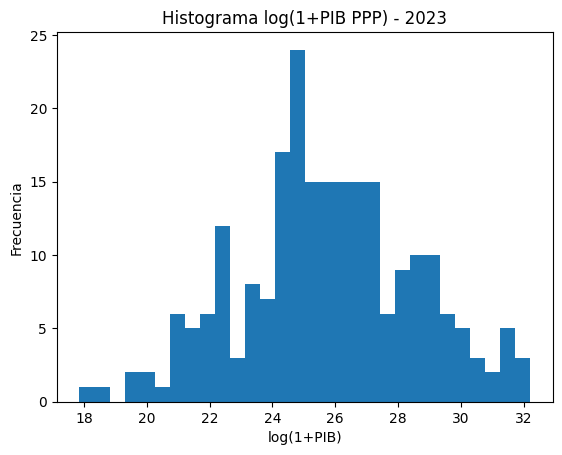

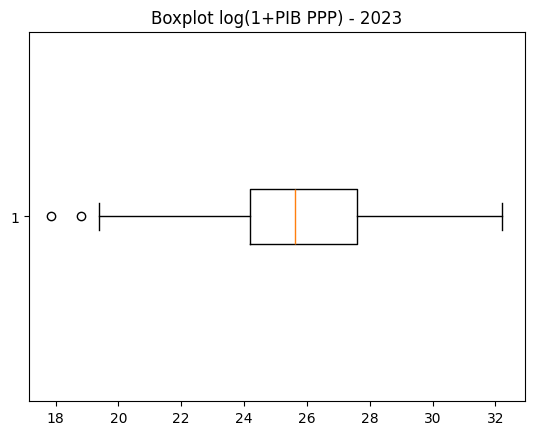

In [25]:
# Ocuparemos Log para que no quede aplastado



import matplotlib.pyplot as plt
import numpy as np

pib = df_paises[col_pib].astype(float)

plt.figure()
plt.hist(np.log1p(pib), bins=30)
plt.title("Histograma log(1+PIB PPP) - 2023")
plt.xlabel("log(1+PIB)")
plt.ylabel("Frecuencia")
plt.show()

plt.figure()
plt.boxplot(np.log1p(pib), vert=False)
plt.title("Boxplot log(1+PIB PPP) - 2023")
plt.show()


In [26]:
import plotly.express as px

fig = px.choropleth(
    df_paises,
    locations=col_pais,
    locationmode="ISO-3",
    color=col_pib,
    hover_name=col_pais,
    title="PIB PPP por país (2023)"
)
fig.show()


In [27]:
df_paises[[col_pais, col_pib]].sort_values(col_pib, ascending=False).head(10)


,country,NY.GDP.MKTP.PP.KD
247,IBT,9.742739e+13
248,IBD,8.798229e+13
226,PST,6.561784e+13
243,LTE,5.536760e+13
259,EAS,5.507806e+13
257,TEA,4.167729e+13
260,EAR,4.155577e+13
255,ECS,4.077281e+13
175,CHN,3.200488e+13
10,USA,2.497712e+13


In [28]:
df_paises[[col_pais, col_pib]].sort_values(col_pib, ascending=True).head(10)


,country,NY.GDP.MKTP.PP.KD
15,TUV,5.705451e+07
79,NRU,1.469237e+08
92,MHL,2.640863e+08
66,PLW,2.911832e+08
114,KIR,4.162215e+08
88,FSM,4.296519e+08
21,TON,7.353608e+08
7,VUT,1.030020e+09
161,DMA,1.215685e+09
51,STP,1.279326e+09


En este escenario podemos ver el top 10 de los paises con mayor y menos PIB, de esta manera contarstamos con escenarios logicos que uno puede tender a pensar a visualizar, si bien no es un requeriemiento si podriamos hacer algun tipo de inferencia sobre el sistema que tiene cada pais y que tan prosperos.

En la etapa 1 pudimos ver como se estan comportando los datos que estamos utilizando y que valores Nan teniamos para la investigacion, a lo cual, utilizmaos el criterios que "$>15\%$" se borrarian ya que seria una columna muy contaminada y, para el resto de variables utilizariamos algun criterio para reemplazar, como sabemos qe son variables macros decidimos utilizar una imputacion a traves de la mediana por robustes.

ETAPA 2